# Projet Débruitage - Yang Benjamin

Le but de ce projet est d'apprendre ce qu'est le bruit de manière expérimentale, de générer soi-même du bruit pour mieux le comprendre, puis d'appliquer plusieurs filtres pour débruiter

## Créer du bruit artificiel

La première partie de ce projet vise à simuler du bruit sur les images. Nous explorerons différents types de bruit. Commençons par le gaussien

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def im_show(img, title="Result"):
    plt.figure(figsize=(10, 8))
    
    # Cas 1 : Image en niveaux de gris (Matrice 2D)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        
    # Cas 2 : Image couleur (Tenseur 3D)
    else:
        # On passe de BGR (OpenCV) à RGB (Matplotlib)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        
    plt.title(title)
    plt.axis('off')
    plt.show()

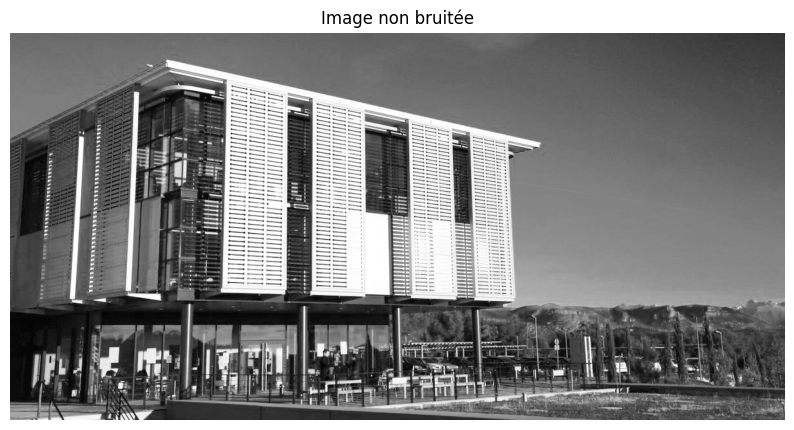

In [7]:
img_RGB = cv2.imread("../data/pns_original.png")
img = np.zeros_like(img_RGB[:, :, 0])
img = 0.10*img_RGB[:,:,0] + 0.30*img_RGB[:,:,1] + 0.6*img_RGB[:,:, 2] #passage au niveau de gris pour simplifier
im_show(img, "Image non bruitée")

In [8]:
def add_gaussian_noise(img, sigma=20):
    noise = np.random.normal(0, sigma, img.shape)
    noise_img = np.clip(img+noise, 0, 255)

    return noise_img

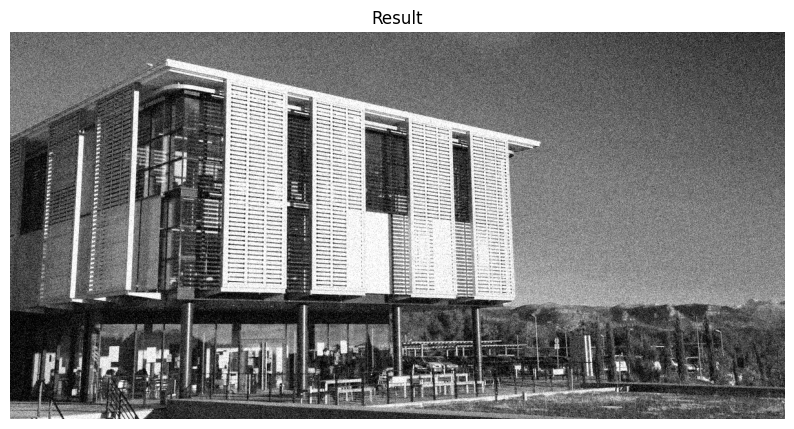

In [13]:
gaussian_noise_img = add_gaussian_noise(img, 20)
im_show(gaussian_noise_img)

Après avoir expérimenté le bruit gaussien qui est une légère variation de chaque point, on va passer au bruit Sel & Poivre qui consiste en une destruction totale de l'information de quelques points.

In [14]:
def add_salt_and_pepper(img, ratio=0.05):
    sap = np.random.random(img.shape)
    noise_img = np.copy(img)
    noise_img[sap < ratio/2]=0 #les points aléatoires en dessous de ratio/2 deviennent absolument noirs
    noise_img[sap > 1-ratio/2]=255 #les points au dessus de 1-ratio/2 deviennent absolument blancs

    return noise_img

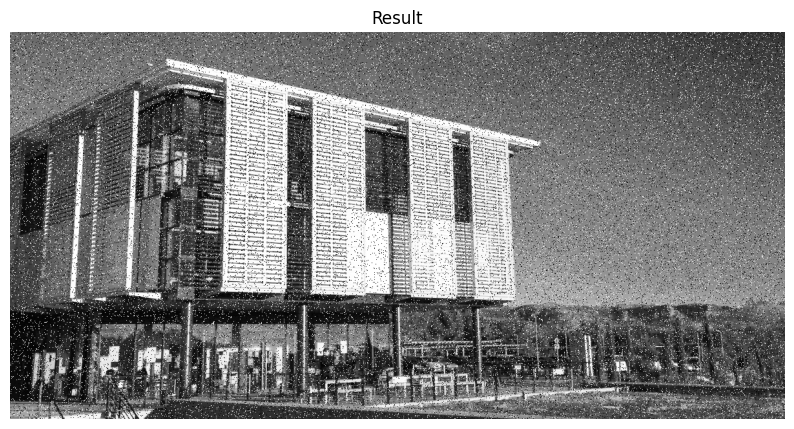

In [18]:
salt_and_pepper_img = add_salt_and_pepper(img, 0.1)
im_show(salt_and_pepper_img)